In [1]:
# importa libraries necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import files
from oauth2client.client import GoogleCredentials
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Autenticação para acesso aos dados
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Autenticação para acesso aos dados
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
# Download dos dados para esta máquina virtual
downloaded_x_anomes_11 = drive.CreateFile({'id': '1IJDsIW-Owa7kyHBSfOBKH9qSqWRhI5vF'})
downloaded_y_anomes_11 = drive.CreateFile({'id': '16TzXnUacl4Rug565oPgxTiFmMgbDCLwS'})
downloaded_x_anomes_11.GetContentFile('x_anomes11.csv') 
downloaded_y_anomes_11.GetContentFile('y_anomes11.csv') 

In [ ]:
# Carregando os dados baixados em um dataframe 
x_anomes_11 = pd.read_csv('x_anomes11.csv')
y_anomes_11 = pd.read_csv('y_anomes11.csv')

In [ ]:
# limpando as colunas
x_anomes_11 = x_anomes_11.drop(columns=["Unnamed: 0", "num_atend_atrs", "num_atend", "qtd_reclm", "cod_rating"])
y_anomes_11 = y_anomes_11.drop(columns=["Unnamed: 0"])

In [ ]:
# Download dos dados para esta máquina virtual
df = pd.read_csv('/content/drive/MyDrive/Módulos/G1 - Módulo 3 - Banco Pan/Projeto_Banco_Pan_Grupo_1/CSVs/mediana_df_clientes_engajados.csv')

In [ ]:
df.shape


(257791, 15)

#Separando os X e Y

In [ ]:
x = df.drop(columns=["ind_engaj", "Unnamed: 0", "num_cpf_hash"]).copy() 

In [ ]:
x.columns

Index(['vlr_credito', 'vlr_saldo', 'num_atend_atrs', 'vlr_score',
       'num_produtos', 'num_atend', 'qtd_oper', 'qtd_reclm', 'qtd_restr',
       'cod_rating', 'ind_atrito', 'restr'],
      dtype='object')

In [ ]:
y = df.drop(columns=["Unnamed: 0", "num_cpf_hash","restr", "vlr_credito", "vlr_saldo", "num_atend_atrs", "vlr_score", "num_produtos", "qtd_oper", "qtd_reclm", "qtd_restr", "cod_rating", "ind_atrito", "num_atend"]).copy()

In [ ]:
y.columns 

Index(['ind_engaj'], dtype='object')

#Verificando as importancias das features com o RandomForestClassifier

In [ ]:
# feature extraction
model = RandomForestClassifier()
model.fit(x, y)

RandomForestClassifier()

In [ ]:
features_grau_de_importancia = pd.DataFrame(model.feature_importances_, index = x.columns, columns=["importancia"]).sort_values("importancia", ascending=False)

In [ ]:
features_grau_de_importancia

,importancia
vlr_saldo,0.288996
vlr_credito,0.218519
vlr_score,0.206642
qtd_oper,0.132308
num_produtos,0.057146
restr,0.033854
cod_rating,0.031656
qtd_restr,0.029194
ind_atrito,0.001637
num_atend,0.000041


In [ ]:
print(model.feature_importances_)

[2.18518632e-01 2.88995849e-01 5.66547099e-06 2.06641931e-01
 5.71457772e-02 4.13964227e-05 1.32308428e-01 1.85667843e-06
 2.91935296e-02 3.16560552e-02 1.63658108e-03 3.38542977e-02]


#Definindo um novo X e Y


In [ ]:
x = df.drop(columns=["ind_engaj", "Unnamed: 0", "num_cpf_hash", "cod_rating", "qtd_restr", "num_atend", "num_atend_atrs", "ind_atrito", "qtd_reclm"]).copy() 

In [ ]:
y = df.drop(columns=["Unnamed: 0", "num_cpf_hash", "restr","vlr_credito", "vlr_saldo", "num_atend_atrs", "vlr_score", "num_produtos", "qtd_oper", "qtd_reclm", "qtd_restr", "cod_rating", "ind_atrito", "num_atend"]).copy()

In [ ]:
y.columns


Index(['ind_engaj'], dtype='object')

#Dividindo entre modelos de treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.33, random_state = 42)

In [ ]:
x_train.shape

(172719, 6)

#Modelo RandomForestClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# feature extraction
model = RandomForestClassifier(
    bootstrap= True,
    max_depth= None,
    min_samples_leaf= 3,
    min_samples_split= 2,
    n_estimators= 100,
    n_jobs= -1,
    random_state= 42
)
model.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=3, n_jobs=-1, random_state=42)

In [ ]:
anomes_predict = model.predict(x_anomes_11)
f1_score(y_anomes_11, anomes_predict)

0.749335038020179

In [ ]:
y_pred = model.predict(x_test)

<h2>Avaliando o modelo

In [ ]:
f1_score(y_test, y_pred)

0.8209999916374675

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score
confusion_matrix(y_test, y_pred)

array([[14921, 14002],
       [ 8023, 48126]])

In [ ]:
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)

print(recall, precision)

0.8571123261322553 0.7746265773886171


In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    "n_estimators" : [80, 90, 100],
    "max_depth" : [1, 2, 3, None],
    "min_samples_split": [1, 2, 3],
    "min_samples_leaf": [1, 2, 3],
    "bootstrap" : [True],
    "n_jobs"  : [-1],
    "random_state": [42]
}

grid_search = GridSearchCV(RandomForestClassifier(),params)

In [ ]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [1, 2, 3, None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [80, 90, 100], 'n_jobs': [-1],
                         'random_state': [42]})

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100,
 'n_jobs': -1,
 'random_state': 42}

In [ ]:
a = df[(df["ind_engaj"] == 1)]

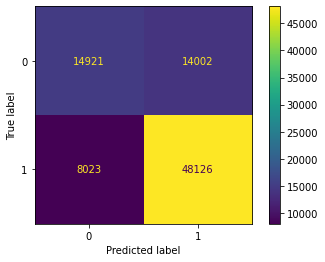

In [ ]:
cm2display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm2display.plot()